# Data Visualizations with Python

### Base Imports

In [1]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

### Set Options

In [2]:
# display up to 999 rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [10]:
# enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%%javascript
// increase output display height before scroll
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
# visualization options
%matplotlib inline
sns.set_style("whitegrid")

### Load & Explore Data

In [6]:
# Data source: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset
df = pd.read_csv('epldata_final.csv', low_memory=False)

In [11]:
# A bit of data cleaning
_ = df.drop('fpl_sel', axis=1)
catg_cols = ['name', 'club', 'position', 'nationality']
_ = df.loc[:, catg_cols] = df.loc[:, catg_cols].apply(lambda x: x.astype('category'))

df.name.cat.categories
df.club.cat.categories
df.position.cat.categories
df.nationality.cat.categories

df.dtypes
df.shape
df.head()
df.sample(20)
df.tail()
df.describe()

Index(['Aaron Cresswell', 'Aaron Lennon', 'Aaron Mooy', 'Aaron Ramsey',
       'Abdoulaye Doucoure', 'Adam Federici', 'Adam Lallana', 'Adam Smith',
       'Ademola Lookman', 'Adrian',
       ...
       'Winston Reid', 'Xherdan Shaqiri', 'Yannick Bolasie', 'Yaya Toure',
       'Yohan Benalouane', 'Yohan Cabaye', 'YounÃ¨s Kaboul', 'Ã‰tienne Capoue',
       'Ã€ngel Rangel', 'Åukasz FabiaÅ„ski'],
      dtype='object', length=461)

Index(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley', 'Chelsea',
       'Crystal+Palace', 'Everton', 'Huddersfield', 'Leicester+City',
       'Liverpool', 'Manchester+City', 'Manchester+United', 'Newcastle+United',
       'Southampton', 'Stoke+City', 'Swansea', 'Tottenham', 'Watford',
       'West+Brom', 'West+Ham'],
      dtype='object')

Index(['AM', 'CB', 'CF', 'CM', 'DM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW',
       'SS'],
      dtype='object')

Index(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Benin', 'Bermuda', 'Bosnia', 'Brazil', 'Cameroon', 'Canada', 'Chile',
       'Colombia', 'Congo DR', 'Cote d'Ivoire', 'Croatia', 'Curacao',
       'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'England', 'Estonia',
       'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'Mali', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'Northern Ireland', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Scotland', 'Senegal', 'Serbia',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'The Gambia', 'Trinidad and Tobago', 'Tunisia', 'United States',
       'Uruguay', 'Venezuela', 'Wales'],
      dtype='object')

name            category
club            category
age                int64
position        category
position_cat       int64
market_value     float64
page_views         int64
fpl_value        float64
fpl_sel           object
fpl_points         int64
region           float64
nationality     category
new_foreign        int64
age_cat            int64
club_id            int64
big_club           int64
new_signing        int64
dtype: object

(461, 17)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
99,David Luiz,Chelsea,30,CB,3,30.00,2745,6.0,20.30%,132,3.0,Brazil,0,4,5,1,0
418,Steven Berghuis,Watford,25,RW,1,5.50,164,5.0,0.10%,0,2.0,Netherlands,0,3,18,0,0
49,Tyrone Mings,Bournemouth,24,CB,3,5.00,422,4.5,0.40%,4,1.0,England,0,2,2,0,0
106,Michy Batshuayi,Chelsea,23,CF,1,25.00,1162,8.5,1.60%,48,2.0,Belgium,0,2,5,1,1
123,Damien Delaney,Crystal+Palace,36,CB,3,1.00,195,4.5,0.60%,51,2.0,Ireland,0,6,6,0,0
294,Massadio Haidara,Newcastle+United,24,LB,3,1.50,114,4.0,0.50%,0,2.0,France,0,2,13,0,0
72,Tomer Hemed,Brighton+and+Hove,30,CF,1,2.50,253,5.0,0.40%,0,4.0,Israel,0,4,3,0,0
275,Chris Smalling,Manchester+United,27,CB,3,18.00,834,5.5,1.30%,52,1.0,England,0,3,12,1,0
373,Kristoffer Nordfeldt,Swansea,28,GK,4,1.50,82,4.0,1.70%,3,2.0,Sweden,0,4,16,0,0
206,Yohan Benalouane,Leicester+City,30,CB,3,1.00,305,4.5,0.10%,27,4.0,Tunisia,0,4,9,0,0


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


# Missing Data

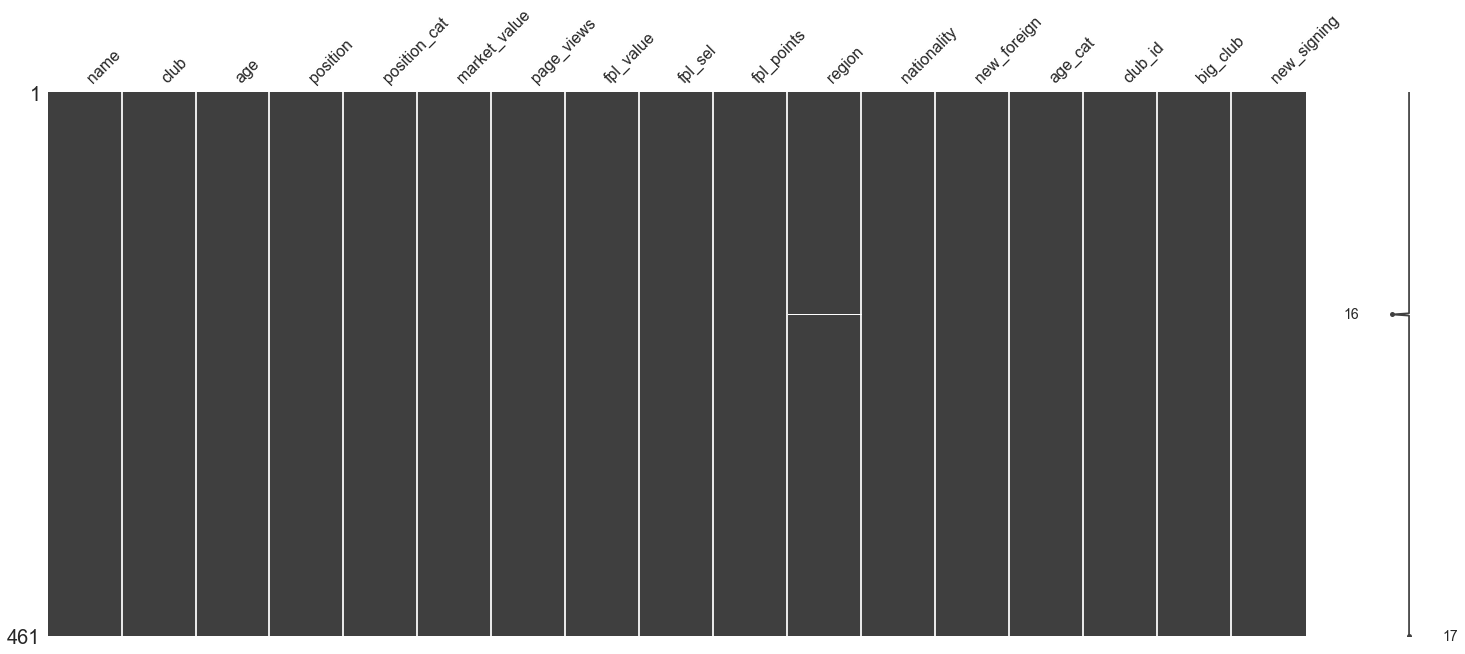

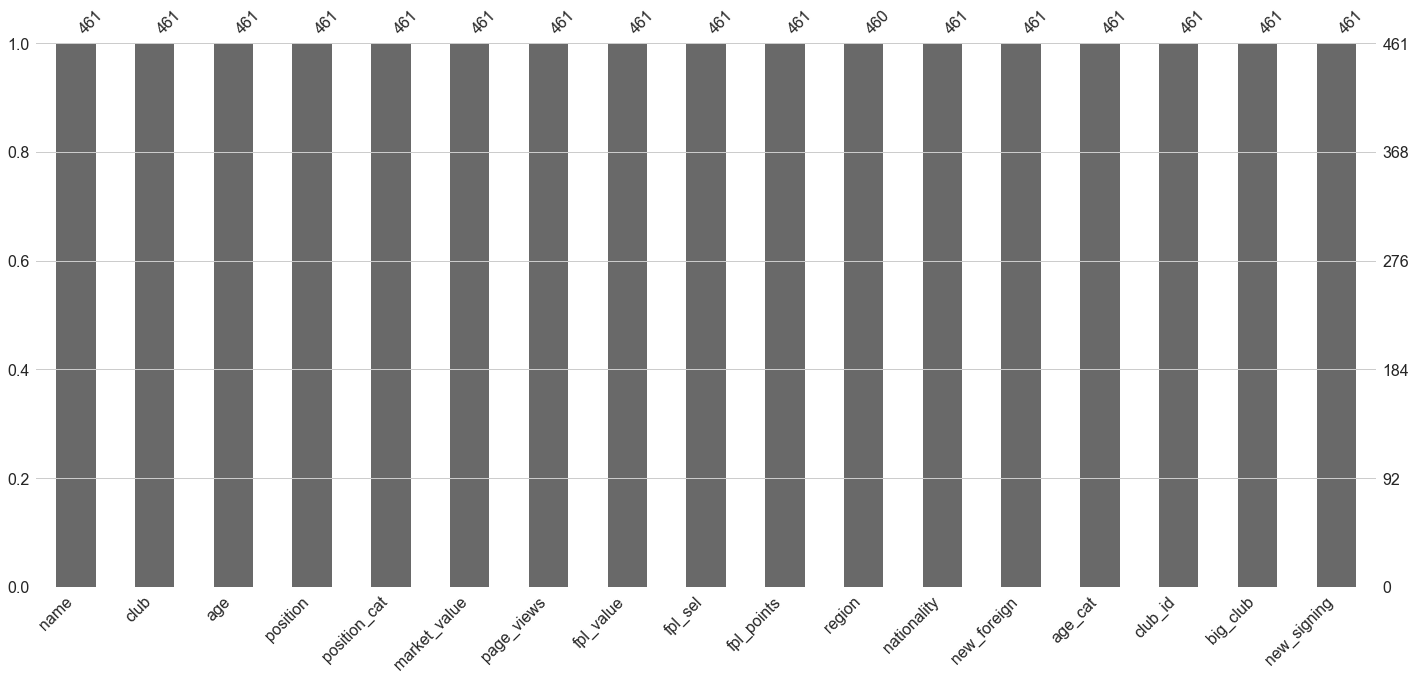

In [9]:
# rand_rows = np.random.rand(100)*100
# rand_cols = np.random.rand(100)*100

# missing = df

# missing[rand_rows, rand_cols]

msno.matrix(df)
msno.bar(df)

# fill NaNs as 0
# df.Deaths = df.Deaths.fillna(0)
# df.Death_Rate = df.Death_Rate.fillna(0)
# df.Age_Adjusted_Death_Rate = df.Age_Adjusted_Death_Rate.fillna(0)

# msno.matrix(df)
# msno.bar(df)

# Quantitative Data

## Continuous Data

### Univariate

#### Histogram

#### Dot Plot

#### Box Plot

In [ ]:
# Set figure size
plt.figure(figsize=(12,12))

df.head()

# # df.sample(100)
# data = df.groupby(['Race_Ethnicity']).agg({'Deaths':sum}).reset_index()

# # ax = sns.boxplot(x=df.Death_Rate)
# ax = sns.boxplot(x="Race_Ethnicity", y="Deaths", data=data)

### Bivariate

#### Scatter Plot

### Multivariate

#### Parallel Coordinate Plot

#### Scatterplot Matrix

## Discrete Data 

### Univariate

#### Bar Chart

### Bivariate

#### Scatter Plot

### Multivariate

#### Parallel Coordinate Plot

In [ ]:
# from pandas.plotting import parallel_coordinates

# data = pd.read_csv('data/iris.data')

# plt.figure()

# parallel_coordinates(data, 'Name')

#### Mosaic Plot

# Categorical Data

## Nominal Data

#### Bar Chart

In [ ]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Race_Ethnicity', y='Death_Rate',  hue='Sex', data=data)

# Set title and rotate axes
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")
plt.xticks(rotation=45) 

#### Horizontal Bar Chart

In [ ]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Death_Rate', y='Race_Ethnicity',  hue='Sex', data=data)

# Set title
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")

#### Faceted Bar Charts

In [ ]:
# # Plot the "Count" of the top 5 highest "Rank" for "Childs_First_Name" in year "2014" by "Ethnicity"
data = df[df.Year == 2014]\
    .groupby(['Leading_Cause', 'Race_Ethnicity'])\
    .agg({'Deaths':sum})\
    .reset_index()

# # Names for x ticks
names = data.Race_Ethnicity.unique()

# # Create facet plots as bar charts
g = sns.FacetGrid(data, col='Leading_Cause', col_wrap=2, size=4, aspect=2, sharey=False)
g.map(sns.barplot, 'Race_Ethnicity', 'Deaths', order=names)

# # Make x ticks available for each subplot
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True, rotation=30)

# # Increase space between subplots
plt.subplots_adjust(hspace=0.5)

# Set title and rotate axes
plt.title("Death Counts by Leading Cause and Ethnicity 2014")

## Oridinal Data

#### Bar Chart

In [ ]:



data = df[df.Gender == 'FEMALE']
data.head()
# data = df[df.Rank < 20]

# df2.plot.bar();

#### Stacked Bar Charts

In [ ]:
# df2.plot.bar(stacked=True);

## Heat Map

In [ ]:
# sns.heatmap(data,linewidth=0,yticklabels=yticks,xticklabels=xticks)

## Time Series

## Violin Plot

In [ ]:
# sns.violinplot(data=df, inner="points", ax=ax)    